In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

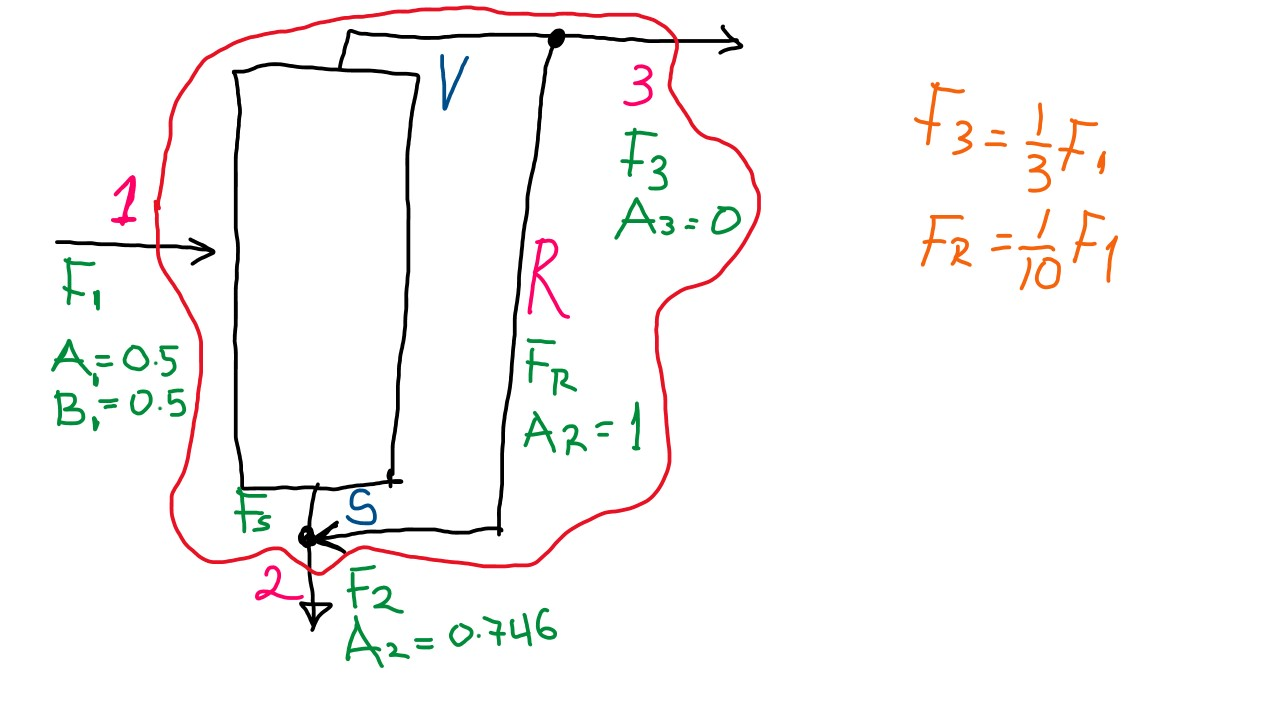

# **BALANCES DE FLUJO**

$F_{1} = F_{2} + F_{3}$

$F_{V} = F_{3} + F_{R}$

$F_{2}= F_{S} + F_{R}$

$F_{3} = {\frac {1}{3}}F_{1}$

$F_{R} = {\frac {1}{10}}F_{1}$

$F_{2}= {\frac {2}{3}}F_{1}$

In [6]:
def Flujos(f1):
  f3 = (1/3)*f1
  f2 = (2/3)*f1
  fr = (1/10)*f1
  fv = f3 + fr
  fs = f2 - fr
  flujos = {"flujos":["f1","f2","f3","fv","fr","fs"], "valores":[f1, f2, f3, fv, fr,fs]}
  flujos = pd.DataFrame(flujos)
  return flujos

In [9]:
FAnalisis = Flujos(500) # kg/s

In [10]:
FAnalisis

,flujos,valores
0,f1,500.000000
1,f2,333.333333
2,f3,166.666667
3,fv,216.666667
4,fr,50.000000
5,fs,283.333333


# **COMPONENTES**

## **Flujo 1**

$A = 0.5$ <br>
$B = 0.5$

## **Flujo 2**

$A = 0.746$ <br>
$B = 0.254$

## **Flujo 3**

$A = 0$ <br>
$B = 1$

## **Flujo R**
$A = 1$ <br>
$B = 0$

## **Flujo V**
$F_{V} A_{V} = F_{3}A_{3} + F_{R}A_{R}$ <br>
$F_{V} A_{V} =  F_{R}A_{R}$ <br>
$ A_{V} =  \frac{F_{R}A_{R}}{F_{V}}$ <br>

$F_{V} B_{V} = F_{3}B_{3} + F_{R}B_{R}$ <br>
$F_{V} B_{V} = F_{3}B_{3} $ <br>
$B_{V} = \frac{F_{3}B_{3}}{F_{V} } $ 

## **Flujo S**
$F_{S}A_{S} = F_{2}A_{2} - F_{R}A_{R}$ <br>
$F_{S}A_{S} = 0.746 F_{2} - F_{R}$ <br>
$A_{S} = \frac{0.746 F_{2} - F_{R}}{F_{S}}$

$F_{S}B_{S} = F_{2}B_{2} - F_{R}B_{R}$ <br>
$F_{S}B_{S} = F_{2}B_{2} $ <br>
$B_{S} = \frac{0.254F_{2}}{F_{S}} $

In [12]:
FAnalisis

,flujos,valores
0,f1,500.000000
1,f2,333.333333
2,f3,166.666667
3,fv,216.666667
4,fr,50.000000
5,fs,283.333333


In [14]:
Prueba = FAnalisis.set_index("flujos")

In [18]:
Prueba

,valores
flujos,
f1,500.000000
f2,333.333333
f3,166.666667
fv,216.666667
fr,50.000000
fs,283.333333


In [25]:
(Prueba.loc["f2"] * 0.5).flotar

valores    166.666667
Name: f2, dtype: float64

In [22]:
def Componentes(F1):
  Fl = Flujos(F1)
  Fl = Fl.set_index("flujos")
  A1 = 0.5* (Fl.loc["f1"])
  B1 = 0.5* (Fl.loc["f1"])
  A2 = 0.746 * (Fl.loc["f2"])
  B2 = 0.254 * (Fl.loc["f2"])
  A3 = 0
  B3 = Fl.loc["f3"]
  AR = Fl.loc["fr"]
  BR = 0
  AV = (Fl.loc["fr"])/(Fl.loc["fv"])
  BV = (Fl.loc["f3"])/(Fl.loc["fv"])
  AS = (0.746*Fl.loc["f2"] - Fl.loc["fr"])/(Fl.loc["fs"])
  BS = (0.254*Fl.loc["f2"])/(Fl.loc["fs"])

  comp = {"Flujos":["f1","f2","f3","fr","fv","fs"], "A":[A1,A2,A3,AR,AV,AS],
          "B":[B1,B2,B3,BR,BV,BS]}
  comp = pd.DataFrame(comp)
  return comp

In [23]:
COMPONENTES = Componentes(100) #kg/s

In [24]:
COMPONENTES

,Flujos,A,B
0,f1,"valores 50.0 Name: f1, dtype: float64","valores 50.0 Name: f1, dtype: float64"
1,f2,"valores 49.733333 Name: f2, dtype: float64","valores 16.933333 Name: f2, dtype: float64"
2,f3,0,"valores 33.333333 Name: f3, dtype: float64"
3,fr,"valores 10.0 Name: fr, dtype: float64",0
4,fv,valores 0.230769 dtype: float64,valores 0.769231 dtype: float64
5,fs,valores 0.701176 dtype: float64,valores 0.298824 dtype: float64
